# Project Apollo - Predicting Quarterly Revenue

### Project Goal
- This project predicts the next quarter's revenue for U.S blue chip companies (Ford Motor Company, Starbucks, and ATT), based on 80 quarters (20 years worth) of various economic, social, political, and environmental factors. The idea is that we can use generic data available to the public rather than industry-specific data or company-specific data to make a good total revenue prediction, better than predicting the average.



### Imports

In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import math

#imports for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#imports necessary for modeling
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import make_scorer

#import .py files
import wrangle as w
import explore as e
import modeling as m

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Dictionary

| Feature | Definition | Unit of Measurement|
|:--------|:-----------|:---------------|
|Adjusted_revenue| The total quarterly revenue of the target Company in dollars adjusted for inflation| U.S. Dollars, float|
|Year| The year of the data |0000 year format|
|Quarter| The quarter of the data |int 1-4|
|Population|The U.S. population for the quarter|int|
|Median_house_income| The median household income per quarter in dollars| U.S. Dollars, float|
|Federal_fund_rate| The interest rate that U.S. banks pay one another top borrow or loan money overnight|percentage, float|
|Unemp_rate| The unemployment rate, the number of residents without a job and looking for work divided by the total number of residents|percentage, float|
|Home_ownership_rate| Home ownership rate by population|percentage, float|
|Government_spending| Government spending in billions of dollars|U.S. Dollars, float|
|Gdp_deflated| Measures changes in the prices of goods and services produced in the United States|float|
|Cpi_all_items_avg| Measures price change experienced by urban consumers; the average change in price over time of a market basket of consumer goods and services|float|
|Avg_temperature| The avg temperature for the quarter| float, fahrenheit|
|Avg_precipitation| The avg rainfall for the quarter|float, inches|
|Palmer_drought_index| The magnitude of PDSI indicates the severity of the departure from normal soil moisture conditions|float|
|Eci|The Employment Cost Index, is a quarterly measure of the change in the price of labor, defined as compensation per employee hour worked|float|
|Dow|Quarterly Dow Jones Industrial average| float|
|P_election| If it is a presidential election year (1=yes)|int, 0-1|
|Midterm_election| If it is a midterm election year (1=yes)|int, 0-1|
|Violent_crime_rate|Violent crimes (involve force or threat of force) per 100,000 |percentage, float|
|Consumer_confidence_index| An indication of future developments based on households' responses 100+ being a positive outlook|float|
|Case_shiller_index| Benchmark of average single-family home prices in the U.S., calculated monthly based on changes in home prices over the prior three months|float|
|Prime| The prime rate is the interest rate that commercial banks charge creditworthy customers|percentage, float|
|Man_new_order|Motor Vehicles and Parts, Monthly, Seasonally Adjusted|U.S Dollars, float|
|Construction_res|Total amount spent on residential construction| U.S. Dollars, float|
|CLI|The composite leading indicator, designed to provide early signals of turning points in business cycles|float|
|Soy|Soy bean prices| U.S. Dollars, float|
|Misery_index|The measure of economic distress felt by everyday people, due to the risk of (or actual) joblessness combined with an increasing cost of living|float|
|Gas_perc_change| Gas percentage change month over month; 3 month average quarters| percentage, float|
|S_and_p|Standard and Poor's 500 Index of stocks quarterly average|U.S. Dollars, float|
|Gini|The Gini index measures the inequality of individual or households 0 being perfectly unequal and 100 being perfectly equal|0-100, int|
|Hdi| Human development index, a summary composite that measures of a country's health, knowledge and standard of living| float|
|Auto_loan| The auto loan rate| percentage, float|
|Velocity_of_money| The frequency at which one unit of currency is used to purchase domestically produced goods/services| float|
|Loans_and_leases| loans and leases from banks| float|
|Wti|West Texas Intermediate oil, a benchmark for the US oil market| float|
|Brent_oil| Brent crude oil prices per quarter| U.S. Dollars, float|
|Number_of_disaster| The number of FEMA disaster declarations per quarter| int|
|Business_confidence_index| An indication of future developments based on business responses 100+ being positive| float|
|C_e_s_housing|Consumer expenditure survey housing, the total amount spent on housing per family unit per year| U.S. Dollars, float|
|C_e_s_health|Consumer expenditure survey health, the total amount spent on health per family unit per year|U.S. Dollars, float|
|C_e_s_entertainment|Consumer expenditure survey entertainment, the total amount spent on entertainment per family unit per year| U.S. Dollars, float|
|Ease_of_doing_business|A score that benchmark economies regulatory performance measured by Doing Business|0-100, float|
|Wars_started| Number of wars per year| int|

# Wrangle
In the wrangle phase, we first brainstormed and came up with a list of 40 variables related to economic, socio-economic, and environmental factors. Each column in the dataset was derived from a unique source.

The majority of the data was available in Excel format, so we created an Excel dataframe and imported it into Jupyter Notebook. For other data sources, we used the `pd.read_clipboard()` function to add them to our dataframe.

Upon completion, we ended up with a dataframe containing three target variables: revenue from Ford, Starbucks, and AT&T. The dataset consisted of 80 rows of data, representing 40 quarters or 20 years.

To handle null values, we took the following approaches:
- For missing values, we researched and found the actual numbers whenever possible.
- In cases where a weighted moving average was appropriate, we applied this method to fill in the null values.
- If some null values remained that we were unable to fill, we made the decision to drop those columns from the dataset.

We adjusted revenue and all other monetary variables using a CPI (consumer price idex) deflation method.
- monetary variable to deflate * (cpi(max))/(cpi)



# Exploration


In [2]:
#import csv for exploration
df = w.get_data()
df.head()

,adjusted_revenue_S,adjusted_revenue_A,adjusted_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,...,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
0,8.953929,30.466827,41.919686,2022,4,334.11,81628.790537,4.10,3.5,9.94494,...,83.785733,893.875,283,96.831203,99.187750,24111.337914,5802.886035,3415.686364,7,5
1,8.645207,32.217698,45.232250,2022,3,333.64,80793.111557,2.56,3.5,11.71485,...,93.142273,905.137,535,96.364630,99.728723,23908.986867,5756.706166,3400.958279,7,5
2,8.391988,30.880146,40.491643,2022,2,333.13,80193.425249,2.40,3.6,12.53299,...,121.187233,910.009,90,96.548767,100.379633,23747.293853,5720.319938,3392.036692,7,5
3,8.107827,30.520064,41.383312,2022,1,332.74,80164.549888,2.39,3.6,12.11522,...,119.325143,872.642,233,97.379660,101.000767,24266.758737,5848.096021,3480.869634,7,5
4,8.809576,31.529260,36.591346,2021,4,332.59,77462.986119,2.27,3.9,11.09446,...,81.724699,832.077,179,98.018177,101.525000,24758.739234,5966.435922,3505.226386,7,7


### Split data for exploration(75/25 split)

In [3]:
#split data into train, validate, test
train, test = e.split_data(df)
train.head()

,adjusted_revenue_S,adjusted_revenue_A,adjusted_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,...,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
1,8.645207,32.217698,45.232250,2022,3,333.640000,80793.111557,2.56,3.5,11.71485,...,93.142273,905.137,535,96.364630,99.728723,23908.986867,5756.706166,3400.958279,7,5
24,7.241271,49.270271,48.994948,2016,4,323.910000,84237.593248,0.12,4.7,6.75080,...,69.534814,554.247,376,100.890333,100.016860,23867.128525,5828.401819,3681.295425,7,7
65,3.007482,24.024688,60.931084,2006,3,298.905385,96990.568396,5.25,4.5,6.51207,...,94.024613,548.461,153,99.864470,99.864010,24610.221262,4159.346939,3574.391784,3,8
45,4.074593,43.940066,45.859909,2011,3,311.890000,81260.557594,0.08,9.0,12.81262,...,150.561886,417.707,1095,96.981693,99.904830,22595.835528,4455.157002,3458.697196,5,10
60,4.023843,43.924219,61.856846,2007,4,302.285879,94080.174105,4.24,5.0,9.10881,...,132.945925,526.113,421,99.074943,99.215990,24578.854482,4144.413229,3919.252328,3,5


# Explore targets
- visualize and check for normalcy

### Ford

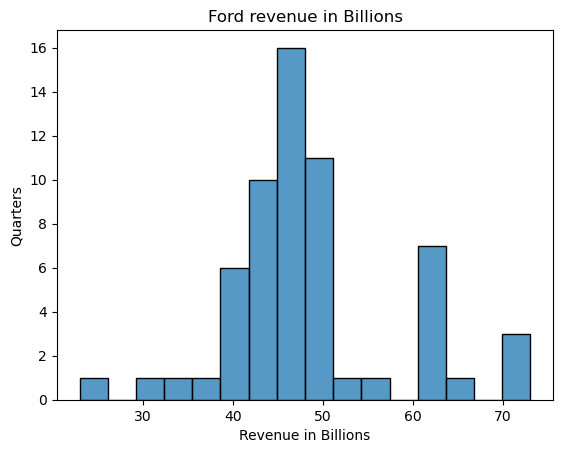

In [4]:
#use function to see
e.plot_ford_target(train)

- Ford's revenue presents as a normal distribution. 
    - We will test to confirm.

# Check for normalcy
$H_{0}$ The target is normally distributed.
    
$H_{a}$ The target is not normally distributed.

In [5]:
# Use function to call Shapiro normalcy test for Ford
e.check_ford_normalcy(train)

Shapiro-Wilk Test
Statistic: 0.9089583158493042
p-value: 0.0002835335908457637


- based on the p-value being less than alpha, we can reject the null hypothesis and infer that Ford's revenue is not normally distributed.

### Att

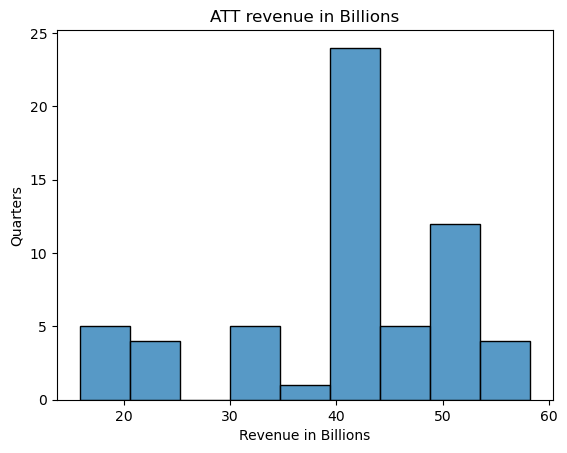

In [6]:
#use function to see
e.plot_att_target(train)

# Check for normalcy
$H_{0}$ The target is normally distributed.
    
$H_{a}$ The target is not normally distributed.

In [7]:
# Use function to call Shapiro normalcy test for ATT
e.check_att_normalcy(train)

Shapiro-Wilk Test
Statistic: 0.8844767212867737
p-value: 3.743886190932244e-05


- based on the p-value being less than alpha, we can reject the null hypothesis and infer that ATT's revenue is not normally distributed.

### Starbucks

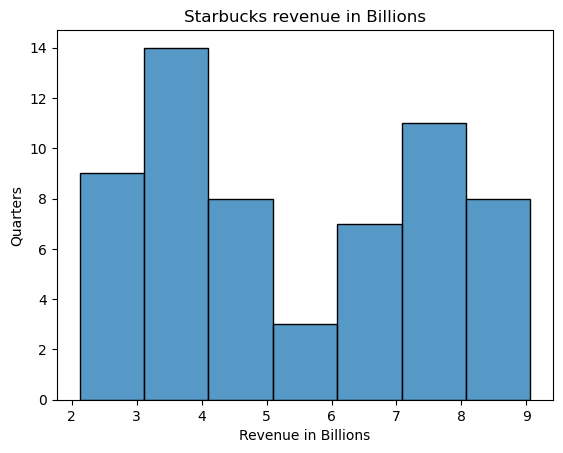

In [8]:
#use function to see
e.plot_starbucks_target(train)

# Check for normalcy
$H_{0}$ The target is normally distributed.
    
$H_{a}$ The target is not normally distributed.

In [9]:
# Use function to call Shapiro normalcy test for Starbucks
e.check_starbucks_normalcy(train)

Shapiro-Wilk Test
Statistic: 0.9290835857391357
p-value: 0.0018162612104788423


- based on the p-value being less than alpha, we can reject the null hypothesis and infer that Starbucks revenue is not normally distributed.

The requirement for pearson's correlation test is that both variables be normally distributed
- Since all three targets are non-parametric, we will us the spearman's rank correlation test as our statistical test for all continuous to continuous variable testing.

# Univariate Analysis

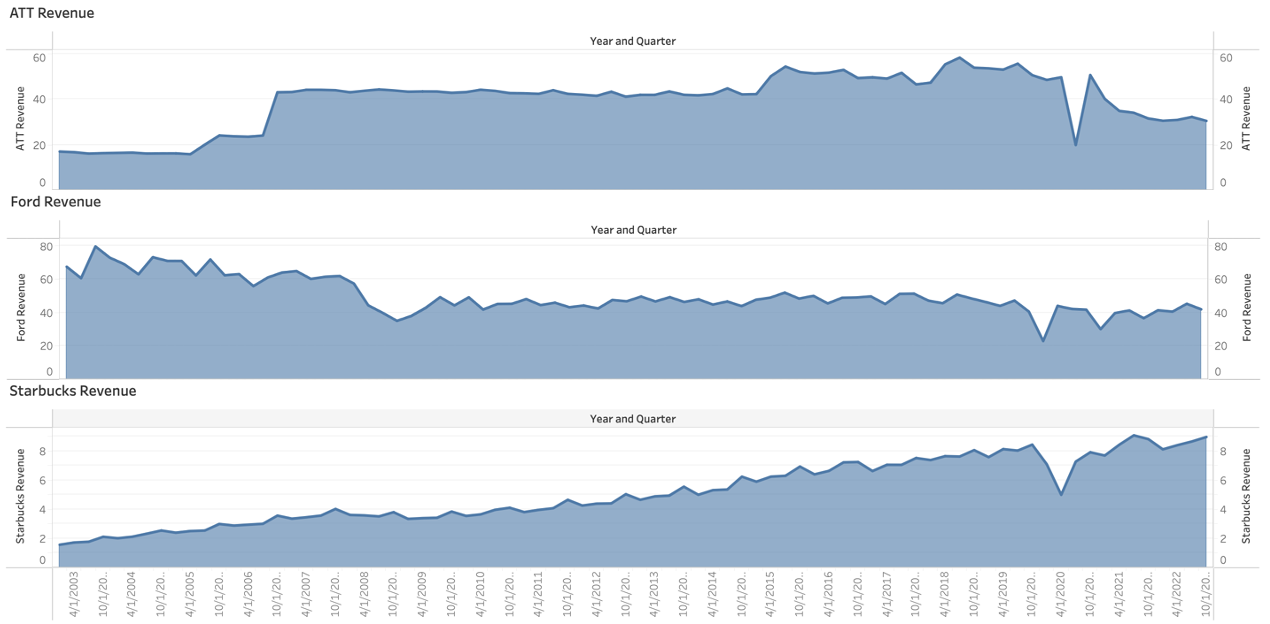

- The above image was produced in Tableau. We can see a few things:
    - There is a substantial increase in revenue for ATT from 2006 - 2007
    - Ford seems to be the only company where the Great Recession had major impacts
        - Ford has not fully recovered from the Great Recession
    - All companies were affected by COVID
        - ATT has yet to recover from COVID
        - Ford not only had the dip in revenue during COVID, but subsequent supply chain issues have caused dips in revenue as well
        - Starbucks appears to have fully recovered from the economic downturn spurred on by COVID

# Stats testing
- All stats test for continuous v. continuous variables will follow the same null and alternative hypothesis

### Are the independent variables statistically significant to revenue?

$H_{0}$ The independent variables do not influence revenue.
    
$H_{a}$ The independent varaibles do influence revenue.

#### Stats for Starbucks

In [10]:
# Run Spearmanr function on Starbucks target + other continuous variables in the dataframe (excluding other targets)
e.run_starbucks_stats(train)

,Variable,P-Value,Result
0,year,3.167443e-34,Reject the null hypothesis
1,quarter,4.648640e-01,Fail to reject the null hypothesis
2,population,2.793326e-36,Reject the null hypothesis
3,median_house_income,1.901228e-08,Reject the null hypothesis
4,federal_fund_rate,4.761326e-01,Fail to reject the null hypothesis
5,unemp_rate,5.567598e-06,Reject the null hypothesis
6,misery_index,6.758989e-02,Fail to reject the null hypothesis
7,home_ownership_rate,3.057064e-11,Reject the null hypothesis
8,government_spending,1.215682e-19,Reject the null hypothesis
9,gdp_deflated,8.058592e-37,Reject the null hypothesis


# Visualization for Starbucks

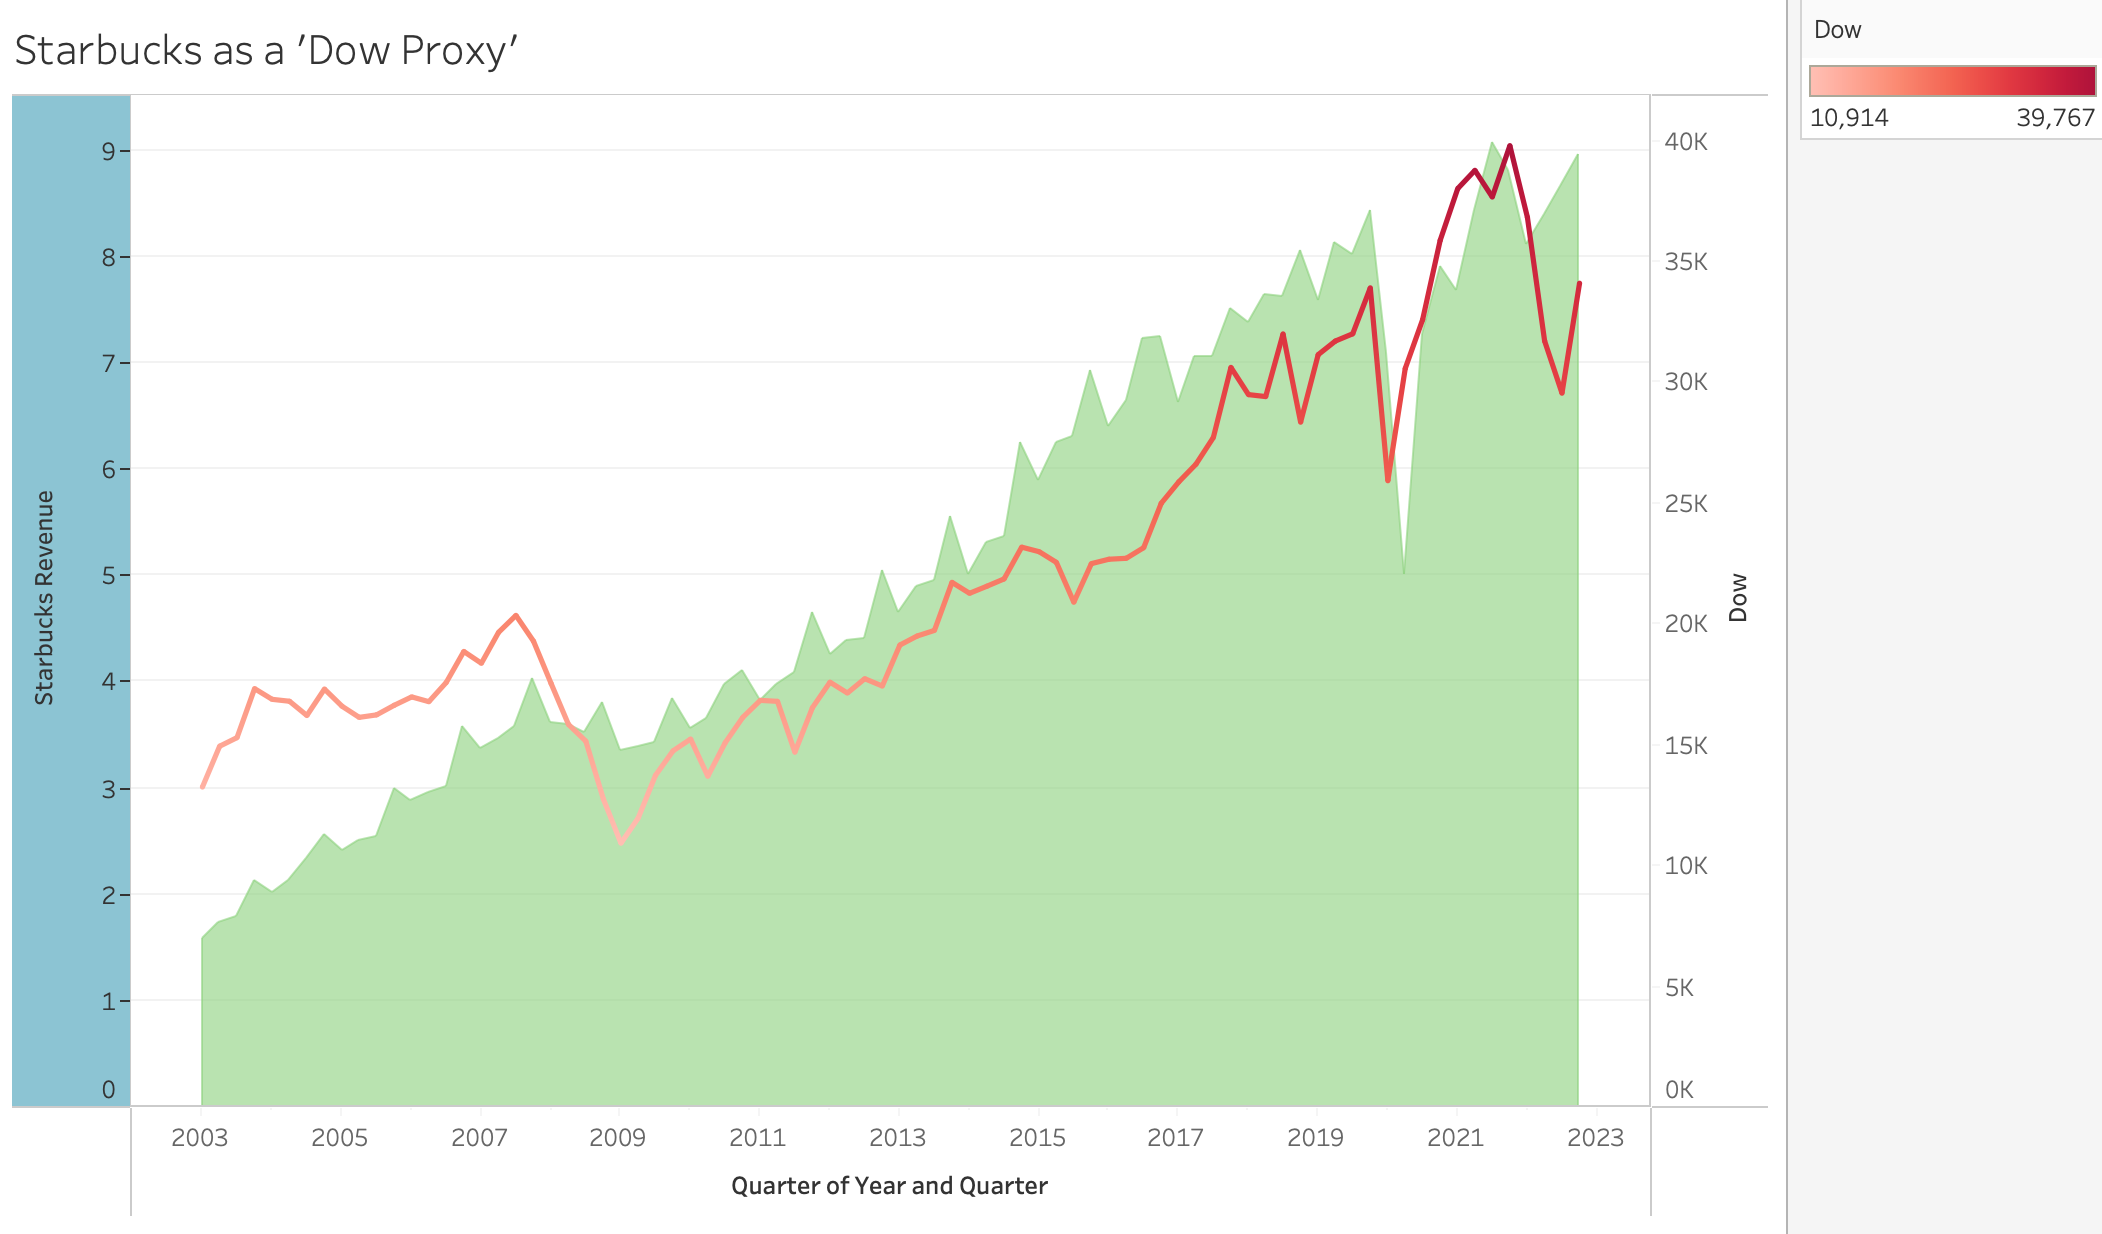

- While not officially designated as a proxy, Starbucks' revenue shows a close alignment with the movement of the DOW and S&P 500, making it a 'de-facto' proxy.
    - A "Dow proxy" or "S&P 500 proxy" typically refers to an investment or financial instrument that closely mimics the performance of the Dow Jones Industrial Average or Standard and Poor's 500.

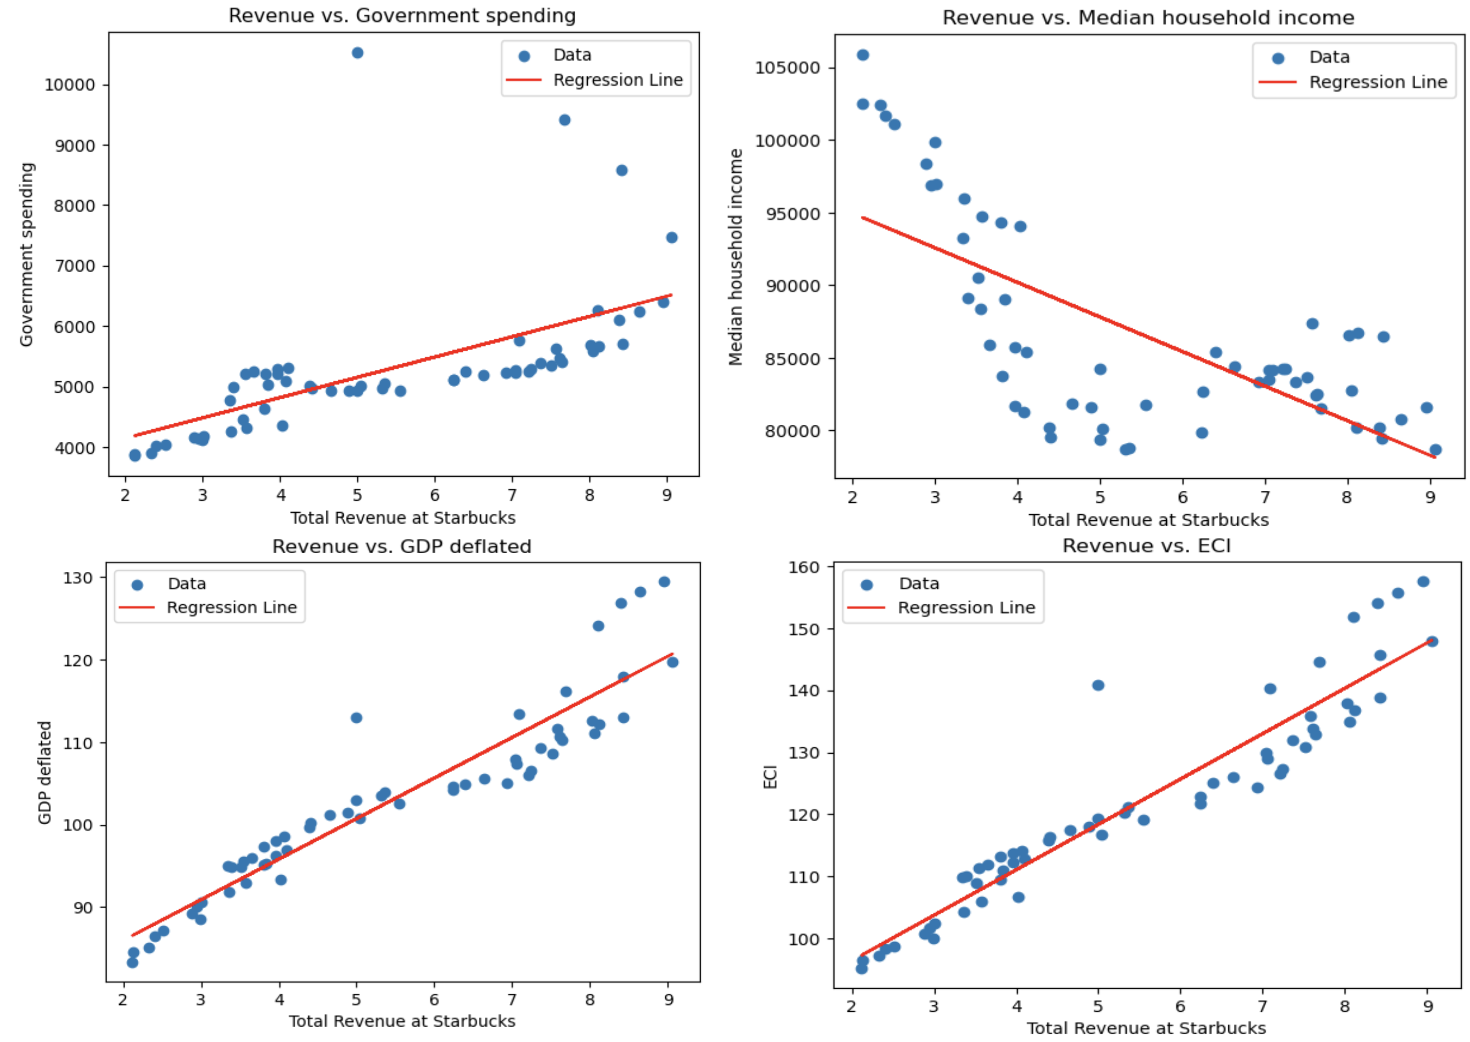

Starbucks exhibits strong correlations with:
   - GDP deflated 0.967
   - ECI 0.967
   - Government spending 0.871
The company exhibits a strong negative correlation with:
   - Median Household Income -0.650

We believe the strong correlating factors will lead to a model that beats RMSE with a high $R^2$ value.

#### Stats test for Ford

In [11]:
# Run Spearmanr function on Ford target + other continuous variables in the dataframe (excluding other targets)
e.run_ford_stats(train)

,Variable,P-Value,Result
0,year,0.000015,Reject the null hypothesis
1,quarter,0.709981,Fail to reject the null hypothesis
2,population,0.000016,Reject the null hypothesis
3,median_house_income,0.000220,Reject the null hypothesis
4,federal_fund_rate,0.251598,Fail to reject the null hypothesis
5,unemp_rate,0.300565,Fail to reject the null hypothesis
6,misery_index,0.045580,Reject the null hypothesis
7,home_ownership_rate,0.111679,Fail to reject the null hypothesis
8,government_spending,0.000001,Reject the null hypothesis
9,gdp_deflated,0.000014,Reject the null hypothesis


# Visualization for Ford

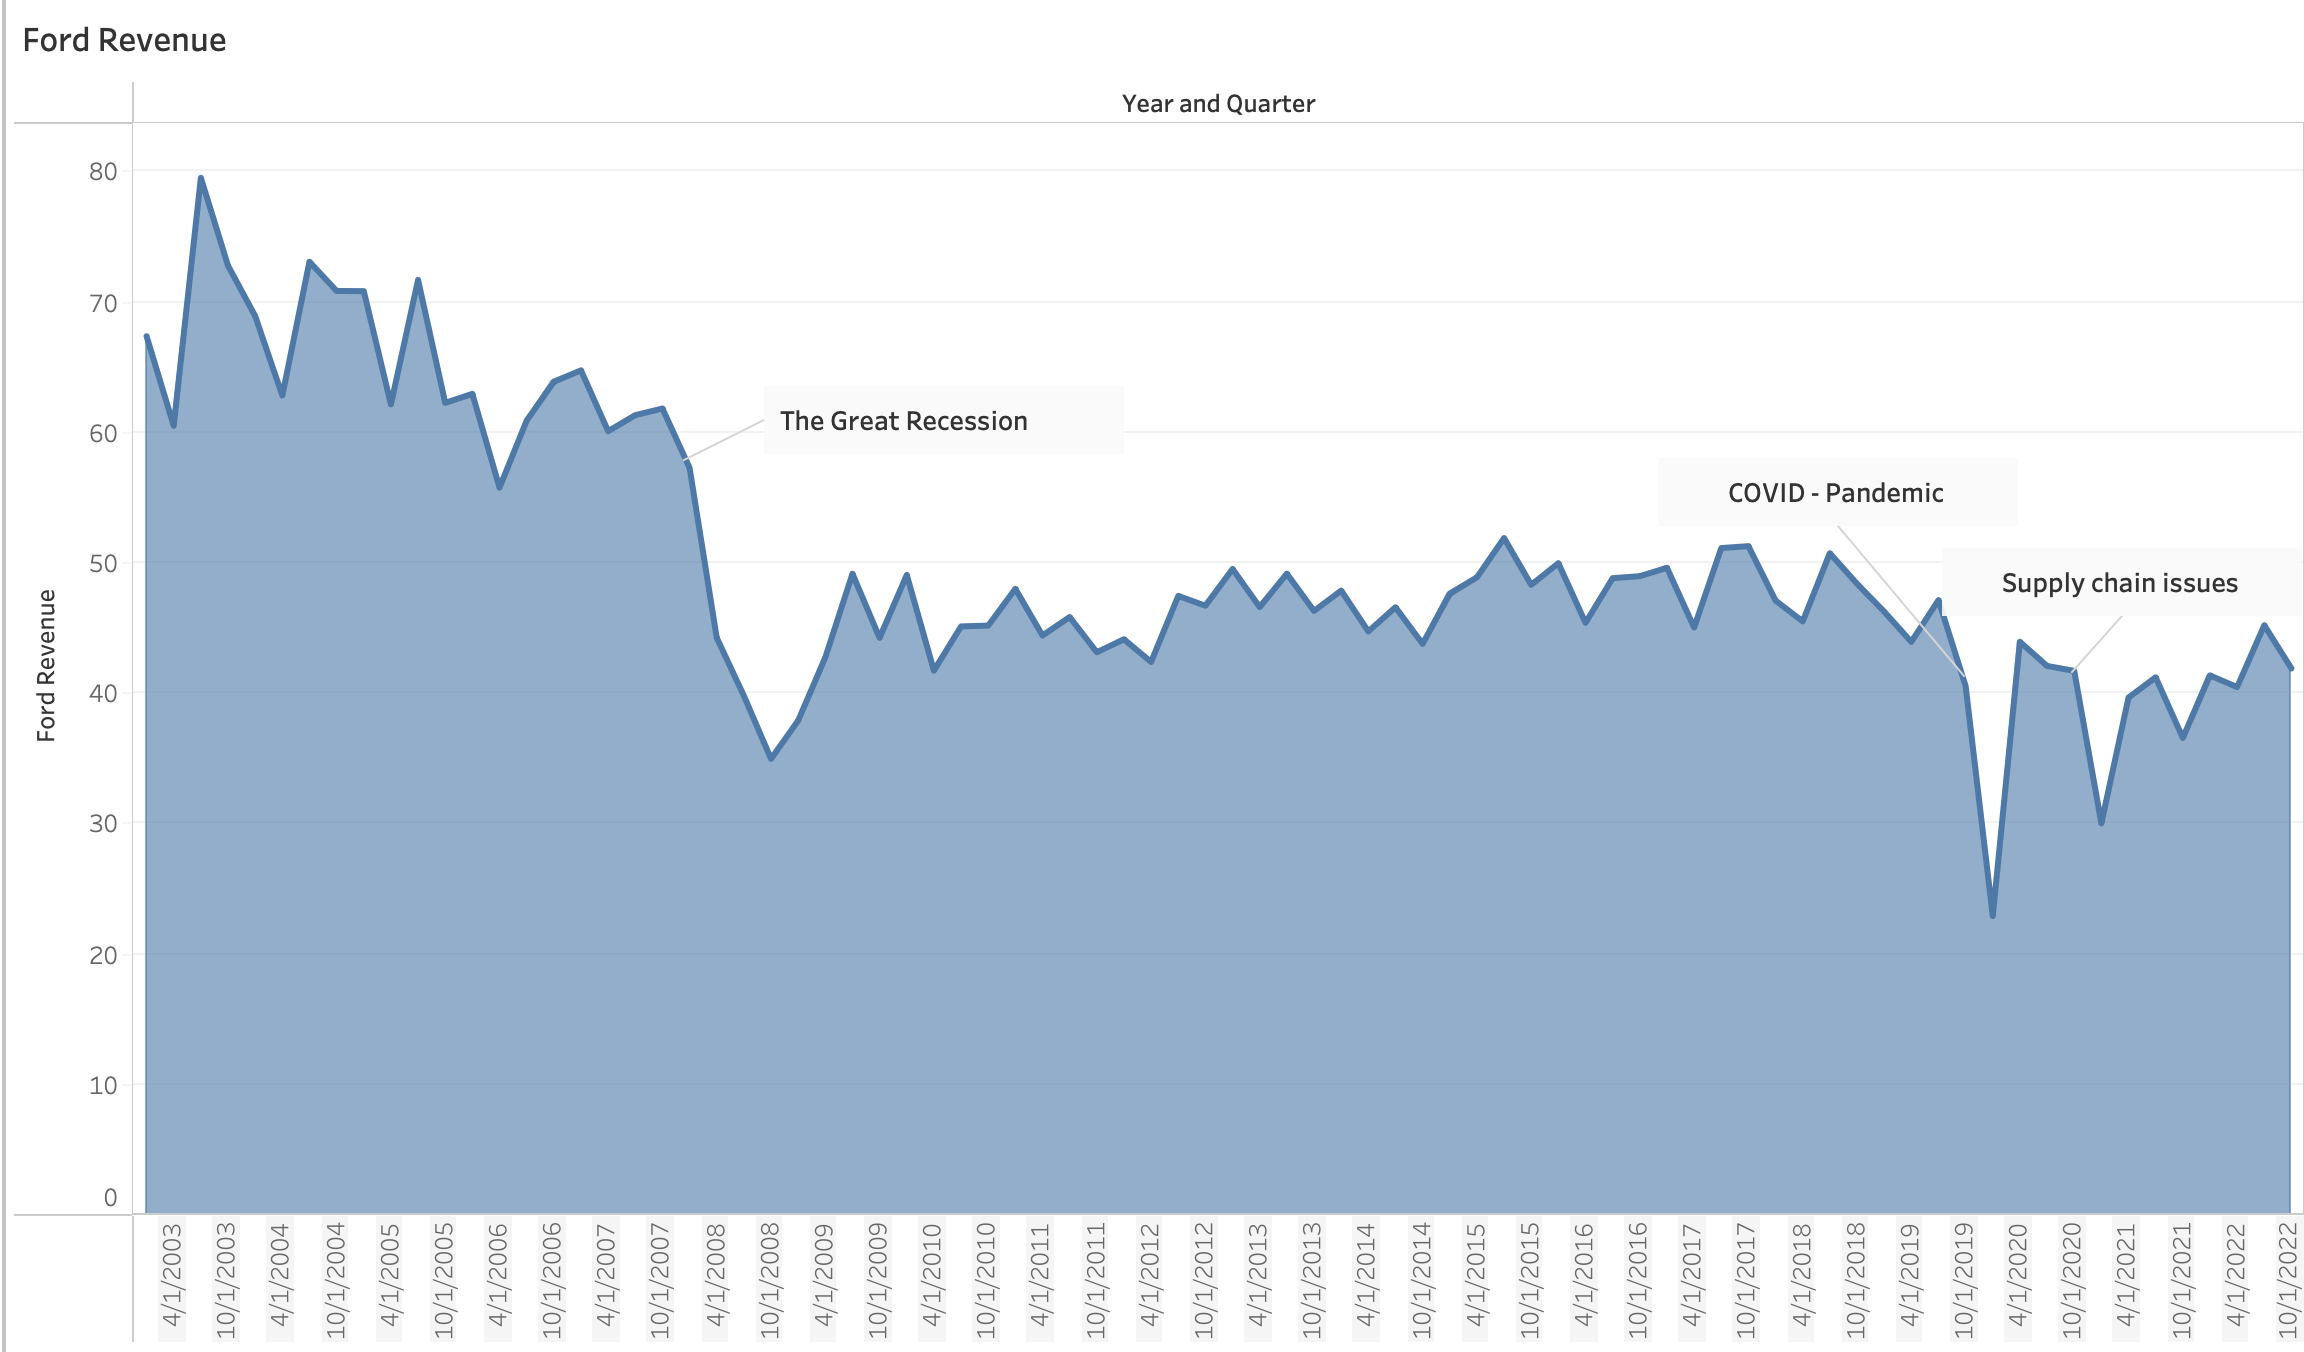

In the graph above, we can un-pack quite a few observations
- While Ford's overall revenue has shown an upward trend since 2003, the picture changes when we account for inflation. Inflation-adjusted revenue reveals a different story, indicating a decline over the years. The most significant decrease occurred during the 2008 financial crisis, where revenue plummeted from 61.8B in Q4 2007 to 34.98B in Q4 2008, resulting in a substantial 26.88B decrease. Despite some recovery, particularly in Q3 2009, with revenue reaching around 49.18B, Ford never fully bounced back from the impact of the Great Recession. Since then, their revenue has remained relatively stable, albeit at a lower level. (All figures presented are in inflation-adjusted dollars.)

    
- Ford took two hits from COVID.
    - First at the onset, and then subsequent supply chain difficulties.

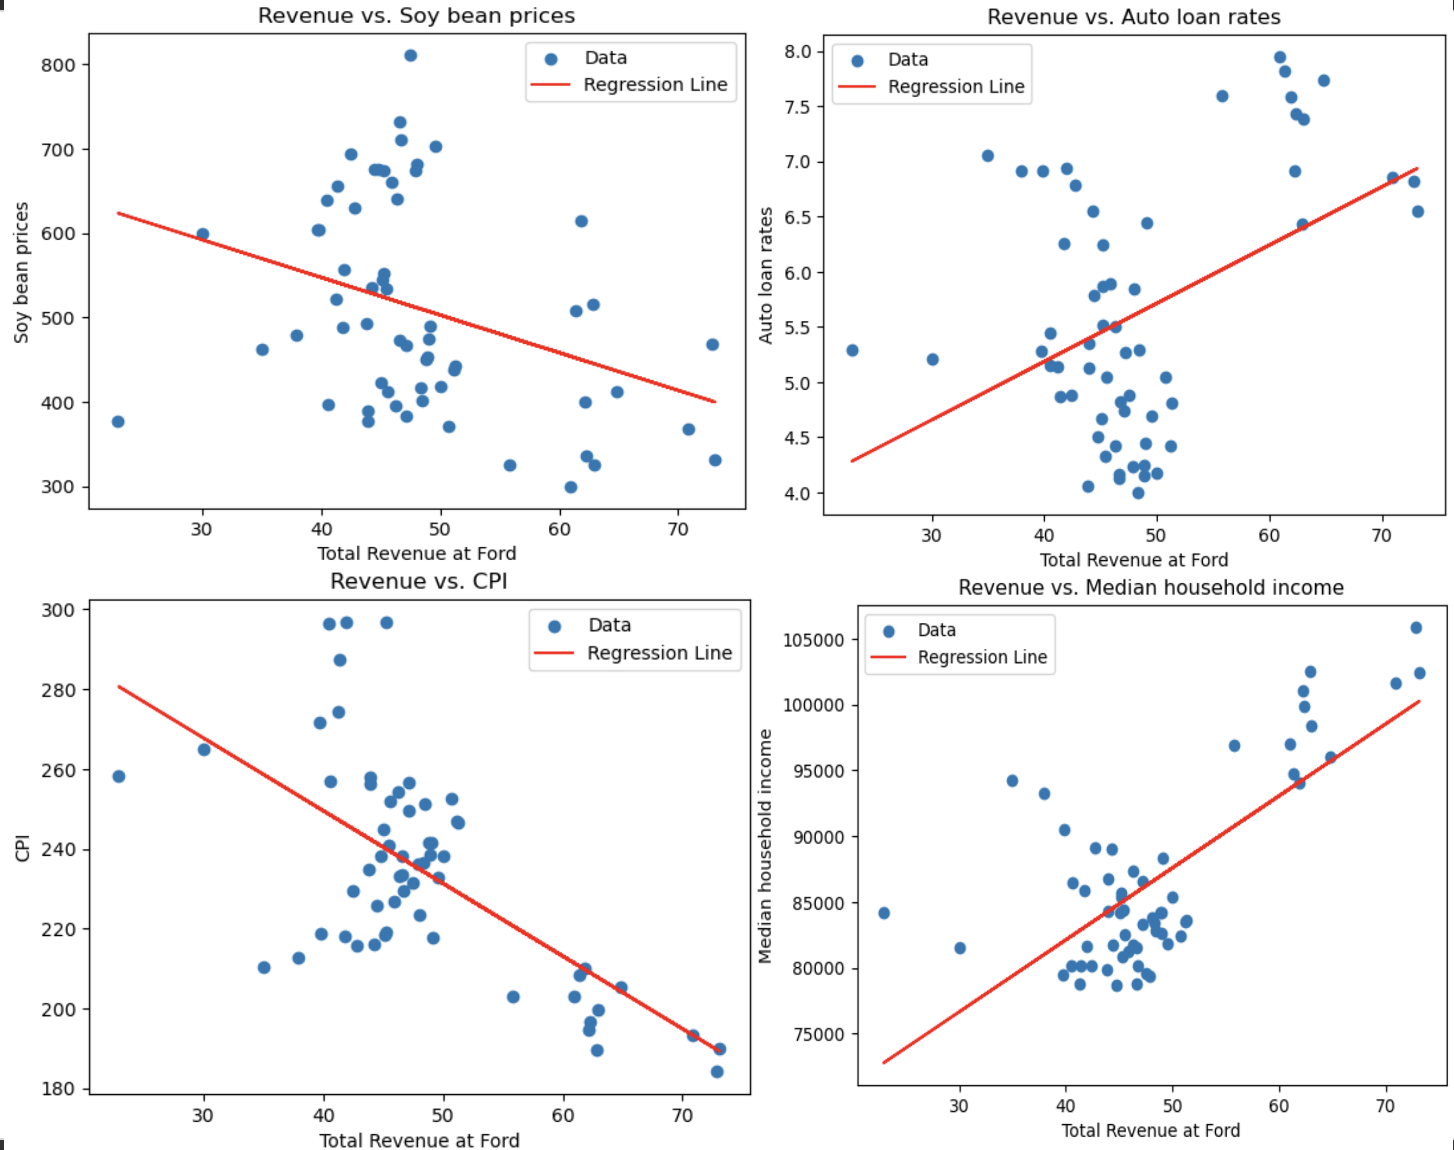

Ford exhibits strong correlations with:
   - Consumer Price Index deflated -0.531
   - Median Household Income 0.459
It was surprising regarding the following:
   - Soy Bean Prices - 0.361
        - Fords revenue is inversely affected by the price soy beans
   - Auto Loan Rates -0.15 **not statistically significant!**
        - Surprising that auto loan rates are not statistically significant
        


#### Stats for ATT

In [12]:
# Run Spearmanr function on ATT target + other continuous variables in the dataframe (excluding other targets)
e.run_att_stats(train)

,Variable,P-Value,Result
0,year,8.990032e-04,Reject the null hypothesis
1,quarter,5.163881e-01,Fail to reject the null hypothesis
2,population,8.665264e-04,Reject the null hypothesis
3,median_house_income,4.947454e-01,Fail to reject the null hypothesis
4,federal_fund_rate,4.969652e-03,Reject the null hypothesis
5,unemp_rate,1.498911e-01,Fail to reject the null hypothesis
6,misery_index,7.458111e-06,Reject the null hypothesis
7,home_ownership_rate,1.334244e-08,Reject the null hypothesis
8,government_spending,4.285058e-04,Reject the null hypothesis
9,gdp_deflated,8.604765e-04,Reject the null hypothesis


# Visualization for ATT

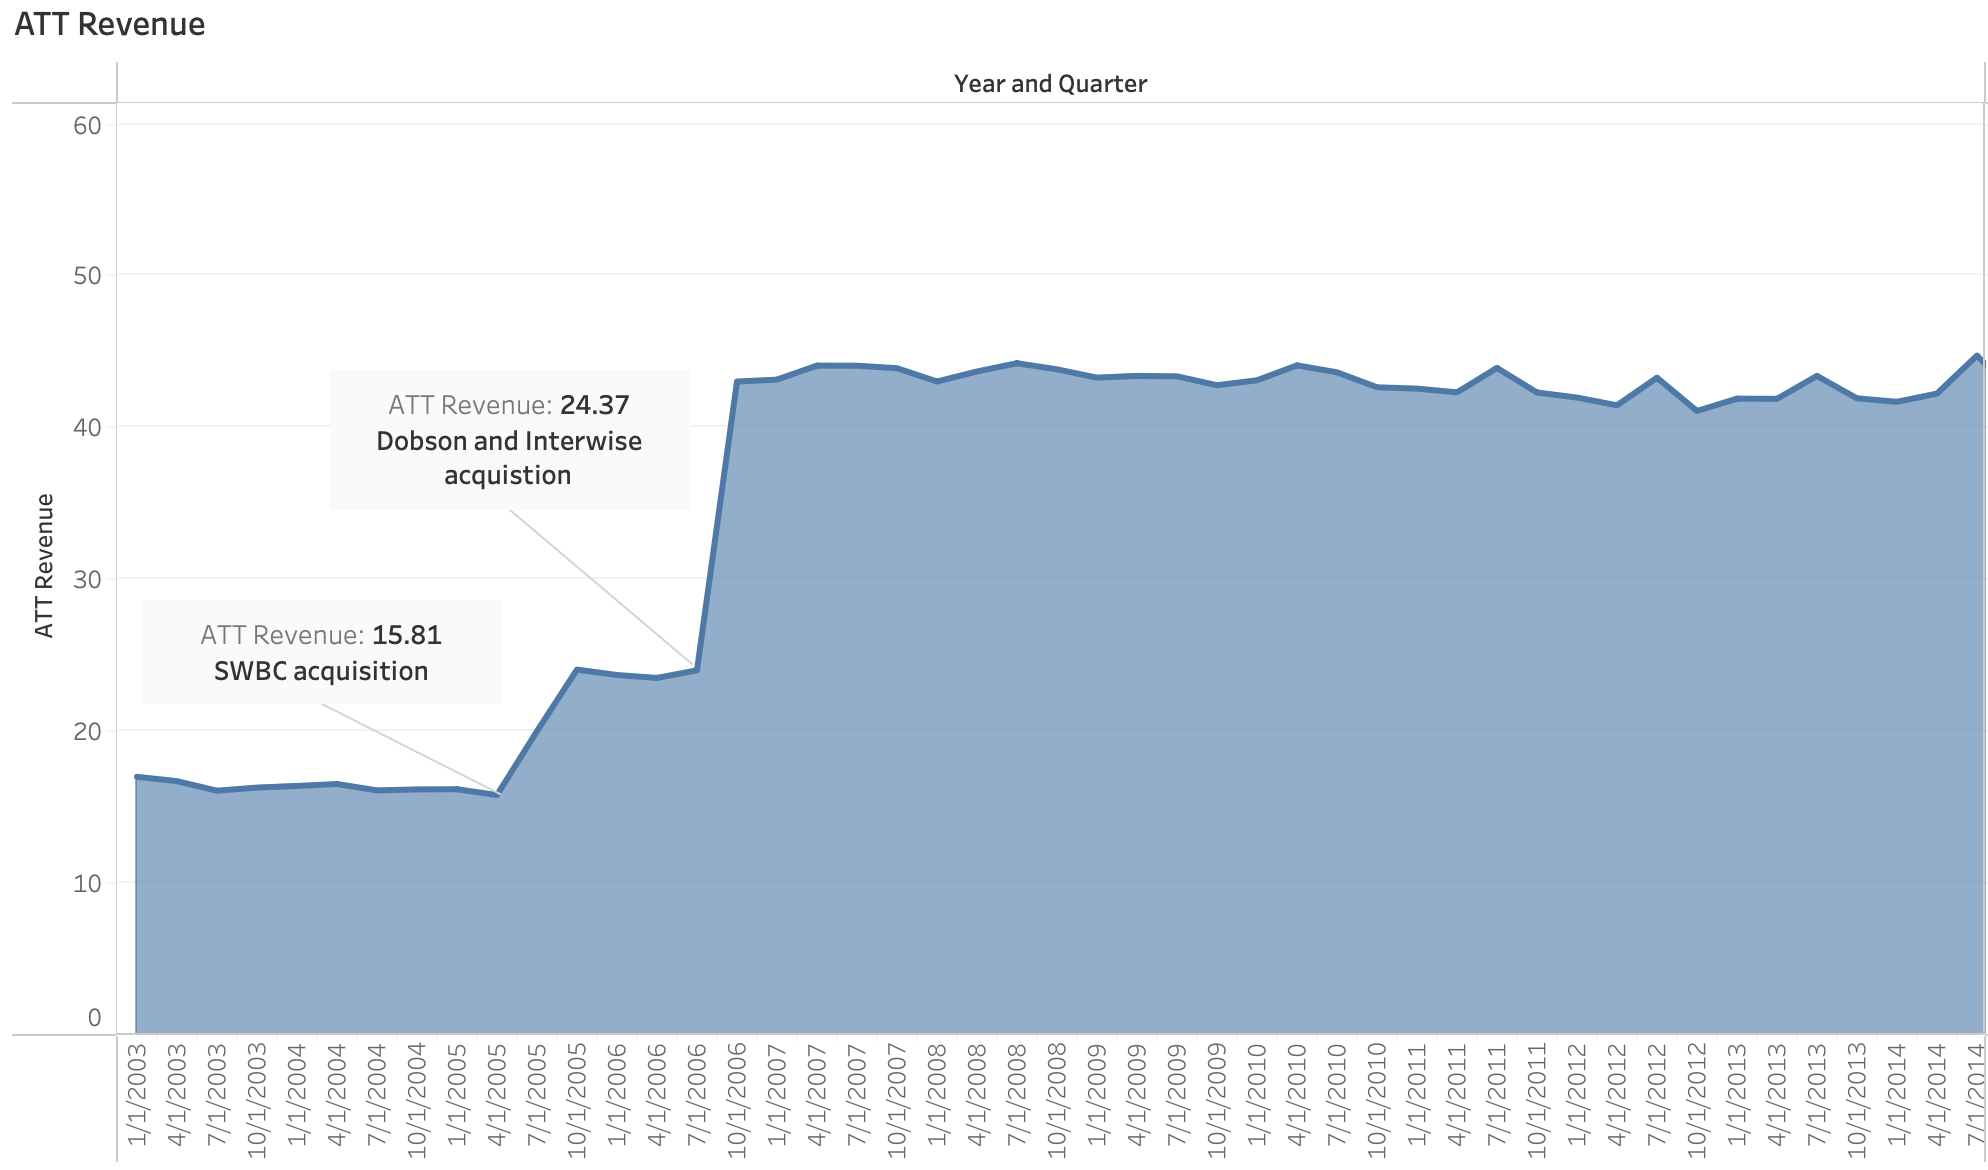

- In 2005, the merger of SBC (Southwestern Bell Corp.) and AT&T resulted in a noticeable revenue jump from 15.81B to 43.04B between April 2005 and October 2006. This acquisition was not accounted for by our independent features.

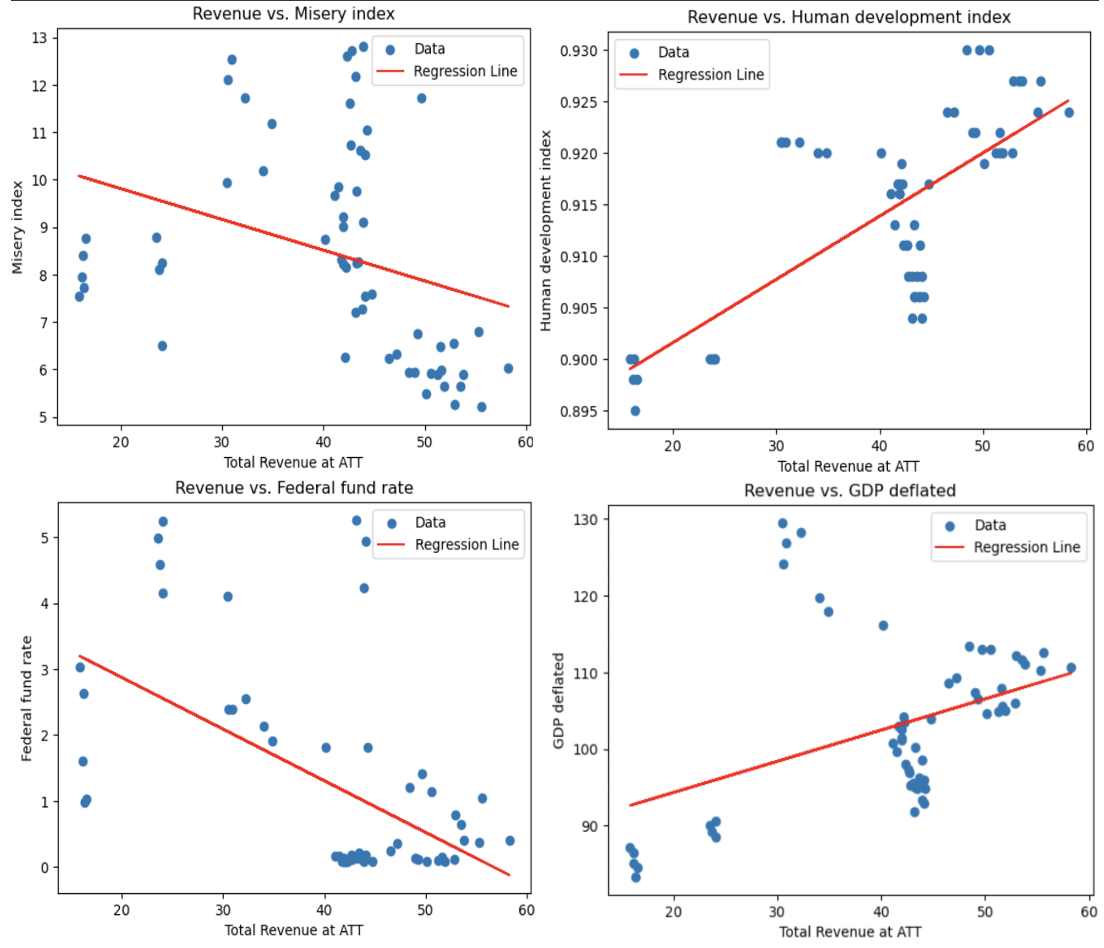

ATT exhibits strong correlations with:
   - Misery Index -0.542
   - Human Development Index 0.631
It was surprising regarding the following:
   - Federal fund rate -0.358
   - GDP deflated 0.419
    

# Exploration Summary

- Visualized through univariate, bivariate and multivarite exploration
- Checked targets for normalcy to determine parametric or non-parametric testing
    - Targets are not normally distributed, therefore spearman's rank correlation test was used for all features
- 19 of 38 features tested are significant to Starbucks revenue
- 15 of 38 features tested are significant to Ford Motor Company's revenue
- 13 of 38 features tested are significant to ATT's revenue
    - year and quarter are not used
- Kbest was used to choose features, and GridSearch was used to tune hyperparameters

# Modeling

## Starbucks Modeling

#### Prepare Starbucks data for modeling & perform modeling for Starbucks


In [13]:
# Get prediction data for Starbucks
starbucks_revenue_prediction = m.get_starbucks_Q1_2023_data_for_prediction()

In [14]:
# Run scale data function for Starbucks and verify
X_train_scaled, X_test_scaled, y_train, y_test, X_train, starbucks_revenue_prediction_scaled = m.starbucks_scaled_df(train, test, starbucks_revenue_prediction)
X_train_scaled.head(1)

,population,median_house_income,unemp_rate,home_ownership_rate,government_spending,gdp_deflated,violent_crime_rate,cpi_all_items_avg,eci,dow,s_and_p,Man_new_order,hdi,auto_loan,velocity_of_money,case_shiller_index,c_e_s_housing,c_e_s_health,ease_of_doing_business
1,0.988978,0.077409,0.0,0.492063,0.355758,0.973183,0.366041,1.0,0.971154,0.668838,0.568406,0.987992,0.742857,0.38481,0.037288,0.990128,0.437354,0.770482,0.833333


In [15]:
# verify prediction column is scaled
starbucks_revenue_prediction_scaled

,population,median_house_income,unemp_rate,home_ownership_rate,government_spending,gdp_deflated,violent_crime_rate,cpi_all_items_avg,eci,dow,s_and_p,Man_new_order,hdi,auto_loan,velocity_of_money,case_shiller_index,c_e_s_housing,c_e_s_health,ease_of_doing_business
0,1.007739,0.129921,0.0,0.492063,0.397661,1.027964,0.193259,1.04469,1.030449,0.816371,0.676912,1.006786,0.742857,0.875949,0.101695,0.962742,0.436811,0.768071,0.833333


#### Baseline model

In [16]:
# call baseline model function for Starbucks
starbucks_metrics_df = m.starbucks_baseline_model(train, y_train)
starbucks_metrics_df

Baseline mean is: 5.44


,model,rmse,r2
0,Baseline,2.08203,-0.000001


#### LassoLars

In [17]:
# Call LassoLars_model function for Starbucks
starbucks_metrics_df,best_model = m.starbucks_LassoLars_model(X_train_scaled, y_train, starbucks_metrics_df)
starbucks_metrics_df

,model,rmse,r2
0,Baseline,2.082030,-0.000001
1,LassoLars,0.396873,0.953558


#### Generalized Linear Model

In [18]:
# Call GLM model for Starbucks
starbucks_metrics_df = m.starbucks_Generalized_Linear_Model(X_train_scaled, y_train, starbucks_metrics_df)
starbucks_metrics_df

,model,rmse,r2
0,Baseline,2.082030,-0.000001
1,LassoLars,0.396873,0.953558
2,Generalized Linear Model,0.407257,0.952216


#### Polynomial Regression/Multiple Regression

In [19]:
# Call polynomial regression function for Starbucks
starbucks_metrics_df = m.starbucks_polynomial_regression(X_train_scaled, y_train, starbucks_metrics_df)
starbucks_metrics_df

,model,rmse,r2
0,Baseline,2.082030,-0.000001
1,LassoLars,0.396873,0.953558
2,Generalized Linear Model,0.407257,0.952216
3,Polynomial Regression(PR),0.422039,0.950275


# Run best model on Test data, Run on test data

In [20]:
rmse, r2 = m.best_model_on_test(X_test_scaled, best_model, y_test)
rmse, r2

(0.22709243715184096, 0.9884537242202951)

- RMSE on test data is 0.22, and $R^2$ is .98.
- This beats baseline by 1.86

#### Make the prediction for Starbucks

In [21]:
# Make prediction on best model
m.starbucks_prediction_Q2_2023_revenue(best_model, starbucks_revenue_prediction_scaled)

Starbucks predicted 2023 Q2 revenue is [8.90542258]


### Starbucks modeling summary
- Using OLS and the multiple regression model on test data:
     - beat RMSE by 1.86B dollars, 
     - $R^2$ value is .988
         - 98% of the variation in revenue can be explained by our features
- The final predicted revenue value for Starbucks 2023 Q2 is **8.91B**
     - fun fact, we checked if Starbucks had released their Q2 data.... Their reported revenue for 2023 Q2 will be released on the ***1st of Aug*** 


# Ford Modeling

#### Prepare Ford data for modeling & perform modeling  for Ford


In [22]:
# Get prediction data for Ford
ford_revenue_prediction = m.get_ford_Q1_2023_data_for_prediction()

In [23]:
# Scale data for modeling and verify
X_train_scaled, X_test_scaled, y_train, y_test, X_train, ford_revenue_prediction_scaled = m.ford_scaled_df(train, test,ford_revenue_prediction)
X_train_scaled.head(1)

,population,median_house_income,misery_index,gdp_deflated,violent_crime_rate,cpi_all_items_avg,eci,prime,gini,hdi,cli,velocity_of_money,consumer_confidence_index,c_e_s_health,ease_of_doing_business
1,0.988978,0.077409,0.855481,0.973183,0.366041,1.0,0.971154,0.496,0.0,0.742857,0.61459,0.037288,0.0,0.770482,0.833333


In [24]:
# Verify prediction line is scaled
ford_revenue_prediction_scaled 

,population,median_house_income,misery_index,gdp_deflated,violent_crime_rate,cpi_all_items_avg,eci,prime,gini,hdi,cli,velocity_of_money,consumer_confidence_index,c_e_s_health,ease_of_doing_business
0,1.007739,0.129921,0.430529,1.027964,0.193259,1.04469,1.030449,0.914,0.809524,0.742857,0.556219,0.101695,0.18997,0.768071,0.833333


#### Baseline Model

In [25]:
# Call function to produce Ford's baseline RMSE
ford_metrics_df = m.ford_baseline_model(train, y_train)
ford_metrics_df

 Baseline mean is : 48.46


,model,rmse,r2
0,Baseline,9.458673,-2.741374e-07


#### LassoLars

In [26]:
# Call function to perform lassolars
ford_metrics_df, best_model = m.ford_LassoLars_model(X_train_scaled, y_train, ford_metrics_df)
ford_metrics_df

,model,rmse,r2
0,Baseline,9.458673,-2.741374e-07
1,LassoLars,5.035640,6.085108e-01


#### Generalized linear model

In [27]:
# Call function to perform generalized linear modeling
ford_metrics_df = m.ford_Generalized_Linear_Model(X_train_scaled, y_train, ford_metrics_df)
ford_metrics_df

,model,rmse,r2
0,Baseline,9.458673,-2.741374e-07
1,LassoLars,5.035640,6.085108e-01
2,Generalized Linear Model,5.092772,6.044782e-01


#### Polynomial Regression

In [28]:
# Call function to perform polynomial regression
ford_metrics_df = m.ford_polynomial_regression(X_train_scaled, y_train, ford_metrics_df)
ford_metrics_df

,model,rmse,r2
0,Baseline,9.458673,-2.741374e-07
1,LassoLars,5.035640,6.085108e-01
2,Generalized Linear Model,5.092772,6.044782e-01
3,Polynomial Regression(PR),5.275814,4.646115e-01


# Run best model on Test data, Run on test data

In [29]:
m.ford_best_model_on_test(X_test_scaled, best_model, y_test)

(6.205168972484091, 0.7286110539088706)

#### Make the prediction for Ford

In [30]:
# Call function to predict Ford's revenue for Q2 2023
m.ford_prediction_Q2_2023_revenue(best_model, ford_revenue_prediction_scaled)

Ford Motor Company's predicted 2023 Q2 revenue is [40.9684742]


### Ford Modeling summary
- Using OLS and the multiple regression model on test data
     - beat RMSE by 3.25B dollars, our 
     - $R^2$ value is .728% 
         - 79.9% of the variation in revenue can be explained by our features
- The final predicted revenue value for Ford 2023 Q2 is **40.96B**
   - fun fact, we will verify this number on ***27 July 2023***, when Ford releases their Q2 earnings. 

# ATT Modeling

### Prepare ATT data for modeling & perform modeling for ATT


In [31]:
# Get prediction data for ATT
att_revenue_prediction = m.get_att_Q1_2023_data_for_prediction()

In [32]:
# Used Kbest and reaccomplished scaling to include the top 13 features, print head to verify scaling
X_train_scaled, X_test_scaled, y_train, y_test, X_train, att_revenue_prediction_scaled = m.att_scaled_df(train, test, att_revenue_prediction)
X_train_scaled.head(1)

,home_ownership_rate,hdi,violent_crime_rate,ease_of_doing_business,population,c_e_s_health,construction_res,federal_fund_rate,auto_loan,eci,gdp_deflated,velocity_of_money,cpi_all_items_avg
1,0.492063,0.742857,0.366041,0.833333,0.988978,0.770482,0.826946,0.478764,0.38481,0.971154,0.973183,0.037288,1.0


In [33]:
# Verify prediction line is scaled
att_revenue_prediction_scaled 

,home_ownership_rate,hdi,violent_crime_rate,ease_of_doing_business,population,c_e_s_health,construction_res,federal_fund_rate,auto_loan,eci,gdp_deflated,velocity_of_money,cpi_all_items_avg
0,0.492063,0.742857,0.193259,0.833333,1.007739,0.768071,0.741944,0.965251,0.875949,1.030449,1.027964,0.101695,1.04469


#### Baseline model

In [34]:
# Call function that defines baseline RMSE
att_metrics_df = m.att_baseline_model(train, y_train)
att_metrics_df

 Baseline mean is : 41.05


,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07


#### LassoLars

In [35]:
# Call function to perform LassoLars modeling
att_metrics_df, best_model = m.att_LassoLars_model(X_train_scaled, y_train, att_metrics_df)
att_metrics_df

,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07
1,LassoLars,3.347021,8.963297e-01


#### Generalized Linear Modeling

In [36]:
# Call function that performs Generalized Linear Modeling
att_metrics_df = m.att_Generalized_Linear_Model(X_train_scaled, y_train, att_metrics_df)
att_metrics_df

,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07
1,LassoLars,3.347021,8.963297e-01
2,Generalized Linear Model(GLM),3.363824,8.954744e-01


#### Polynomial Regression

In [37]:
# Call function that performs Polynomial Regression
att_metrics_df = m.att_polynomial_regression(X_train_scaled, y_train, att_metrics_df)
att_metrics_df

,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07
1,LassoLars,3.347021,8.963297e-01
2,Generalized Linear Model(GLM),3.363824,8.954744e-01
3,Polynomial Regression(PR),3.411010,8.925526e-01


# Run best model on test data

In [38]:
m.att_best_model_on_test(X_test_scaled, best_model, y_test)

(6.123922018642872, 0.7913242468196657)

# Make the prediction for ATT

In [39]:
# Call function that predicts ATT's 2023 Q2 revenue
m.att_prediction_Q2_2023_revenue(best_model, att_revenue_prediction_scaled)

ATT's predicted 2023 Q2 revenue is [35.07585707]


### ATT modeling summary
- Using OLS and the multiple regression model 
    - beat RMSE by 4.78B dollars, our 
    - $R^2$ value is .79
        - 79% of the variation in revenue can be explained by our features
- The final predicted revenue value for ATT 2023 Q2 is **35.07B**
     - fun fact, we checked if ATT released Q2 data.... Their reported revenue for 2023 Q2 is due to be released on ***26 July!!!!!*** 

# Neural Network
- For final notebook review please follow this link
[Neural Network Notebook](https://github.com/Project-Apollo-Forecast/Project-Apollo/blob/main/mlp_mvp.ipynb)
***
***NOTE***
- The above notebook and associated method may not be compatible on all machines
    - Ensure you can successfully download/install/run the Tensorflow library

## Neural Network results

- Due to the random but statistically forecastable nature of neural networks, the mean of distribution of 10 model outputs was taken in order to obtain a distinct and accurate RSME score and prediction.

#### Starbucks - Neural Network Results 
- Using a multilayer perceptron regression deep learning model on test data:
     - beat the ML model's baseline RMSE (2.08) with an average test RMSE of 0.29, 
- The final predicted revenue value for Starbucks 2023 Q2 is **9.0B**
     - fun fact, we checked if Starbucks had released their Q2 data.... Their reported revenue for 2023 Q2 will be released on the ***1st of Aug*** 

#### Ford - Neural Network Results 
- Using a multilayer perceptron regression deep learning model test data
     - beat the ML regression model's baseline RMSE (9.46) and best performing ML model's score (6.21) with an average test RMSE score of 5.57.
- The final predicted revenue value for Ford 2023 Q2 is **43.70B**
   - fun fact, we will verify this number on ***27 July 2023***, when Ford releases their Q2 earnings.

#### AT&T - Neural Network Results
- Using a multilayer perceptron regression deep learning model 
    - beat the baseline regression model's RMSE (10.91) and the best performing ML model (6.12) with an average RMSE score of 5.76
- The average predicted revenue value for ATT 2023 Q2 is **31.02B**
     - Their reported revenue for 2023 Q2 is due to be released on ***26 July!!!!!*** 

# Summary 

#### The goal of this project was to predict revenue for a Blue Chip Company in the next quarter. We explored the potential of economic, socio-economic, and environmental factors in predicting revenue gains and losses.

Key steps and findings in the project include:

- Brainstormed and acquired data from over 40 separate datasets, which were combined into one CSV for exploration.
- Discovered interesting relationships between independent variables during the exploration phase.
- Performed extensive feature selection and statistical testing, resulting in a selection of features for modeling each company: 20 features for Starbucks, 17 features for Ford Motor Company, and 27 features for AT&T. Further refinement was done using RFE, Kbest, and GridSearch methods.
- Important factors contributing to the models' performance included lagging revenue by one period, using previous quarters' data to predict the next quarter's revenue. Additionally, the 2023 Q1 data for Ford, Starbucks, and AT&T's revenue was set aside, this was used to predict Q2 revenue.
- Adjusted monetary features for inflation by performing deflation using the Consumer Price Index.
- Utilized grid search to optimize hyperparameters in conjunction with recursive feature elimination.
- Compared four models for Ford, ATT, and Starbucks, with evaluation metrics including RMSE and R2 scores.
- The best model (Multiple Regression) was applied to the set-aside Q1 features.
- Predicted revenue for Ford in Q2 was 40.96B, indicating a slight decrease from Q1 (41.5B).
- Predicted revenue for ATT in Q2 was 35.07B, indicating an increase from Q1 (30.14B). However, this model may be overpredicting due to the number of significant features (Curse of Dimensionality).
    - Additionally, there were mergers and acquisition in 2005 (Southwestern Bell) and 2006 (Dobson and Interwise) that skews the revenue data significantly. We believe the selected features do not account for this.
- Predicted revenue for Starbucks in Q2 was 8.91B, indicating an increase from Q1 (8.72B).

Key steps and finding with Deep Learning:

- Deployed a deep learning (DL) multilayered perceptron (MPL) regression model with optimized hyperparameters in conjunction with RFE. 
- Evaluated the four MPL models’ results against the RMSE baseline. 
- Compared the MPL model results with the results of the ML models via RMSE score comparison.
- The MPL models outperformed the traditional ML models across the board.
- The Best MPL model was applied to the same Q1 features used in the ML model Q2 predictions. 
- Predicted revenue for Ford in Q2 was 43.7B, indicating an increase from Q1 (41.5B).
- Predicted revenue for ATT in Q2 was 31.02B, indicating an increase from Q1 (30.14).
- Predicted revenue for Starbucks in Q2 was 9.0B, indicating an slight increase from Q1 (8.72B).

Overall, the project achieved promising results in predicting revenue for Ford, ATT, and Starbucks, showcasing the potential of the selected features and models.

    

# Conclusion

Based on the above information, we can conclude that our project successfully explored the use of economic, socio-economic, and environmental factors to predict revenue gains and losses for Ford, ATT, and Starbucks. Through rigorous feature selection and testing, we identified key variables and developed models that outperformed the baseline and produced respectable RMSE and R2 values.

For Ford, using the "classical regression approach", LassoLars regression model performed the best, and our prediction for Q2 revenue indicates a slight decrease from the previous quarter. For Ford the MLP model predicts an increase in Q2 revenues from the previous quarter. Both "classical regression" and deep learning ATT models showed an increase in predicted revenue for Q2 compared to Q1. Finally, both the "classical regression" and deep learning Starbucks models showed positive results, with a slight increase in revenue for Q2 compared to Q1.

Overall, our project highlights the potential of leveraging various factors to predict revenue changes for these companies. While further refinements and validations are needed, these results offer valuable insights and opportunities for future analysis and decision-making in the respective industries.

# Next Steps

Based on the project findings, we can make the following recommendations and outline potential next steps:

1. Further Refinement and Validation:
   - Validate the models by comparing the predicted revenue with the actual revenue for multiple quarters to ensure consistent performance.
   - Perform additional statistical tests and analysis to validate the relationships between the selected features and revenue changes.
   - Refine the models by incorporating additional relevant variables or exploring different algorithms to improve predictive accuracy.


2. Business Impact and Decision-Making:
   - Evaluate the impact of predicted revenue changes on business operations, financial planning, and resource allocation.
   - Conduct sensitivity analysis to assess the potential outcomes under different revenue scenarios and identify areas that require strategic attention.


3. Continuous Data Collection and Feature Selection:
   - Continuously gather updated data on economic, socio-economic, and environmental factors to capture real-time market dynamics.
   - Refine the feature selection process by exploring new variables that could enhance the models' predictive power.


4. Monitor External Factors:
   - Stay updated on industry trends, regulatory changes, and market conditions that could impact the revenue of Ford, ATT, and Starbucks.
   - Monitor external factors such as consumer behavior, competitor performance, and macroeconomic indicators to capture additional insights for revenue forecasting.


5. Collaboration and Feedback:
   - Engage with domain experts and business stakeholders to gain a deeper understanding of the factors influencing revenue changes and gather valuable insights.


6. Expand to Other Companies:
   - Apply the knowledge gained from this project to predict revenue changes for other companies in the automotive, telecommunications, and food and beverage industries.
   - Adapt and refine the models for different market sectors. 

By following these recommendations and embarking on the suggested next steps, organizations can leverage data-driven revenue predictions to make informed decisions, optimize business strategies, and gain a competitive edge in the market.
